In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
load = pd.read_csv('../Data/load.csv')
prices = pd.read_csv('../Data/prices.csv')
res_gen = pd.read_csv('../Data/res_gen.csv')
residual_gen = pd.read_csv('../Data/residual_generation.csv')

load['date'] = pd.to_datetime(load['date'])
prices['date'] = pd.to_datetime(prices['date'])
res_gen['date'] = pd.to_datetime(res_gen['date'])
residual_gen['date'] = pd.to_datetime(residual_gen['date'])

# Convert all price columns to numeric, coercing errors to NaN for non-numeric values in 'price_FRA'
for col in ['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']:
    prices[col] = pd.to_numeric(prices[col], errors='coerce')

#drop missing value rows
prices.dropna(subset=['price_FRA'], inplace=True)
missing_values_prices = prices.isnull().sum()

#prices.fillna(prices.mean(), inplace=True)

## LOAD

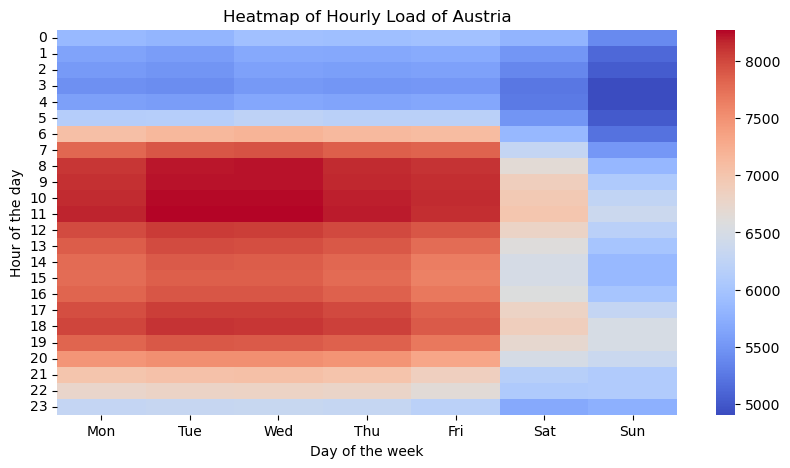

In [33]:
# Heatmap of Hourly Load of all:
load['hour'] = load['date'].dt.hour
load['day'] = load['date'].dt.dayofweek
load['month'] = load['date'].dt.month
load['year'] = load['date'].dt.year

load_pivot1 = load.pivot_table(index='hour', columns='day', values='load_AT', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(load_pivot1, cmap='coolwarm', ax=ax)

ax.set_title('Heatmap of Hourly Load of Austria')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Hour of the day')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


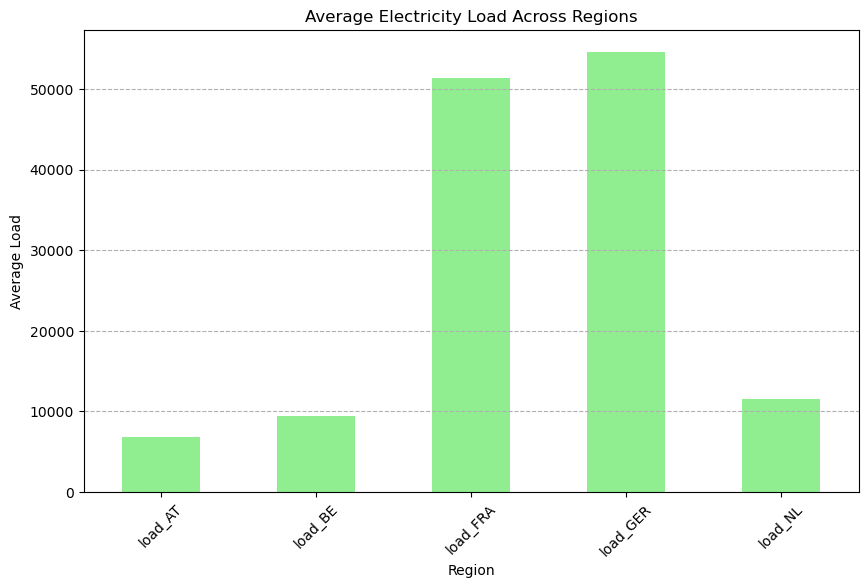

load_AT      6864.160239
load_BE      9425.594009
load_FRA    51372.645747
load_GER    54583.439641
load_NL     11477.387532
dtype: float64


In [27]:
average_load = load[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()
average_load_plot = average_load.plot(kind='bar', figsize=(10, 6), color='lightgreen')

plt.title('Average Electricity Load Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Load')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

print(average_load )



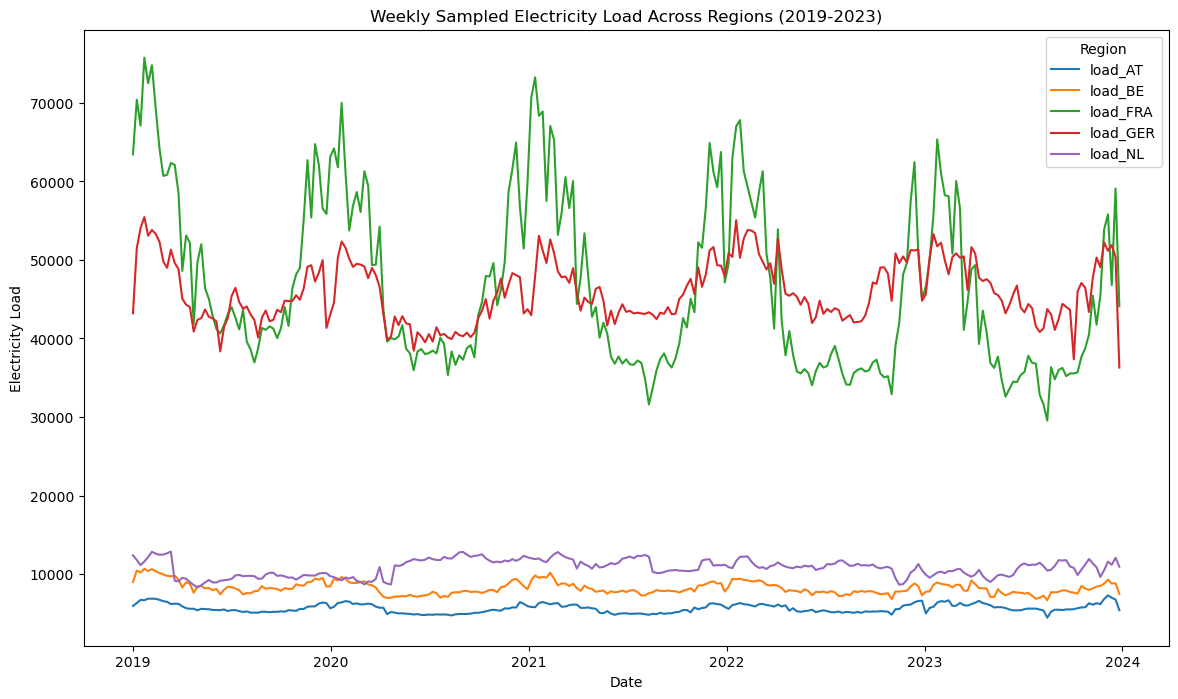

In [3]:

plt.figure(figsize=(14, 8))

for column in ['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']:
    # We'll plot a sample of the data to keep the plot legible and focused
    sampled_data = load.loc[::24*7, ['date', column]]  # Weekly sampling for clarity
    sns.lineplot(x='date', y=column, data=sampled_data, label=column)

plt.title('Weekly Sampled Electricity Load Across Regions (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Electricity Load')
plt.legend(title='Region')

plt.show()

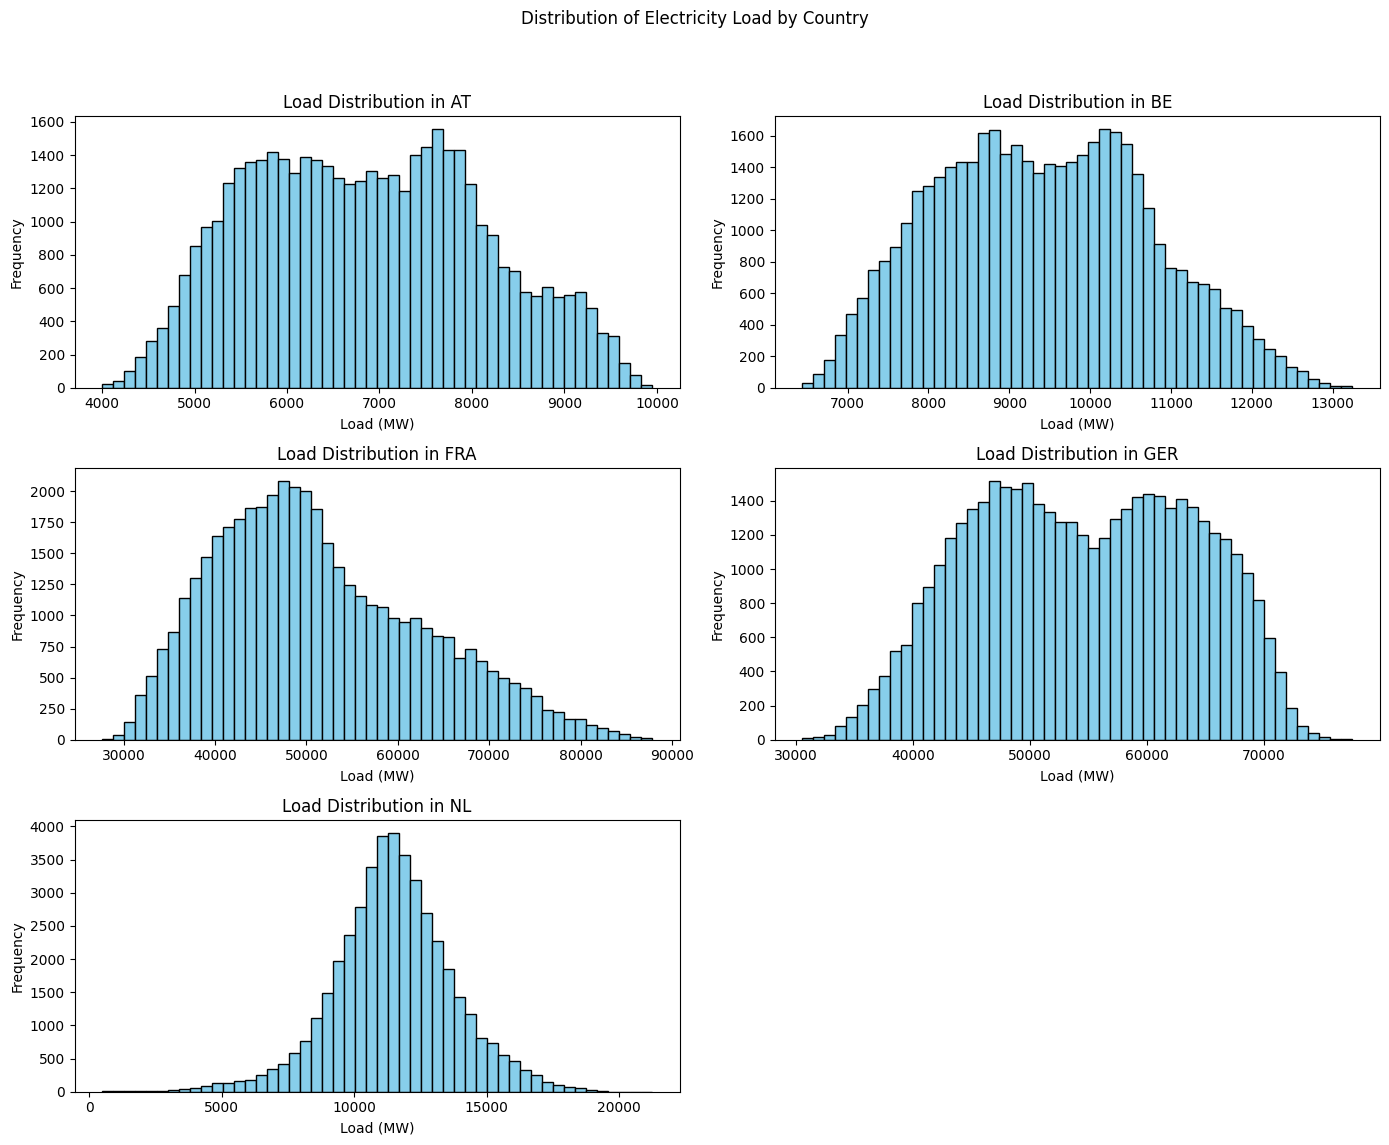

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Distribution of Electricity Load by Country')

axes = axes.flatten()

for i, country_code in enumerate(['AT', 'BE', 'FRA', 'GER', 'NL']):
    axes[i].hist(load[f'load_{country_code}'], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Load Distribution in {country_code}')
    axes[i].set_xlabel('Load (MW)')
    axes[i].set_ylabel('Frequency')

axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

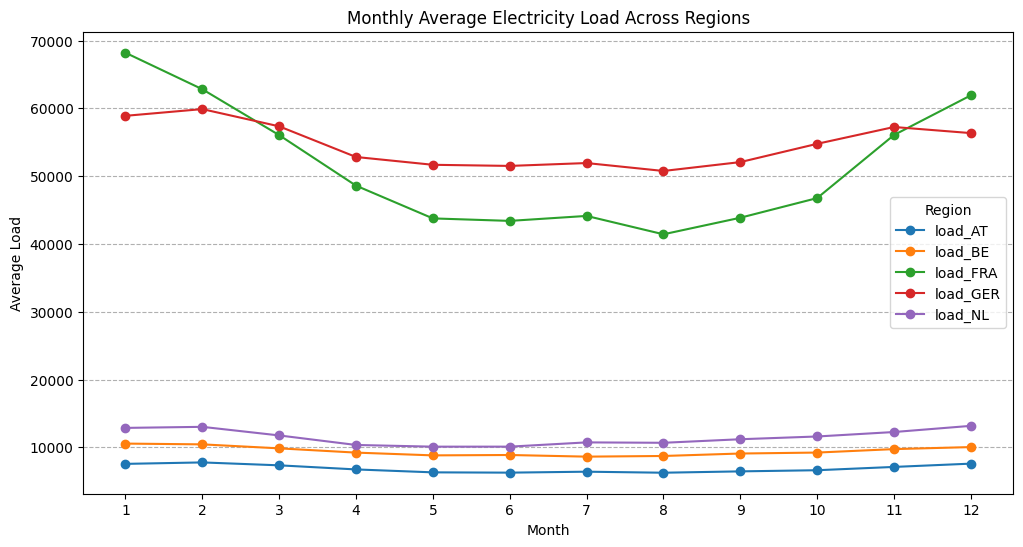

In [43]:
# Plotting the monthly average load for each region to identify seasonal patterns
load['month'] = load['date'].dt.month
monthly_avg_load = load.groupby('month')[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()

plt.figure(figsize=(12, 6))
for column in monthly_avg_load.columns:
    plt.plot(monthly_avg_load.index, monthly_avg_load[column], marker='o', label=column)

plt.title('Monthly Average Electricity Load Across Regions')
plt.xlabel('Month')
plt.ylabel('Average Load')
plt.xticks(monthly_avg_load.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')


## PRICES

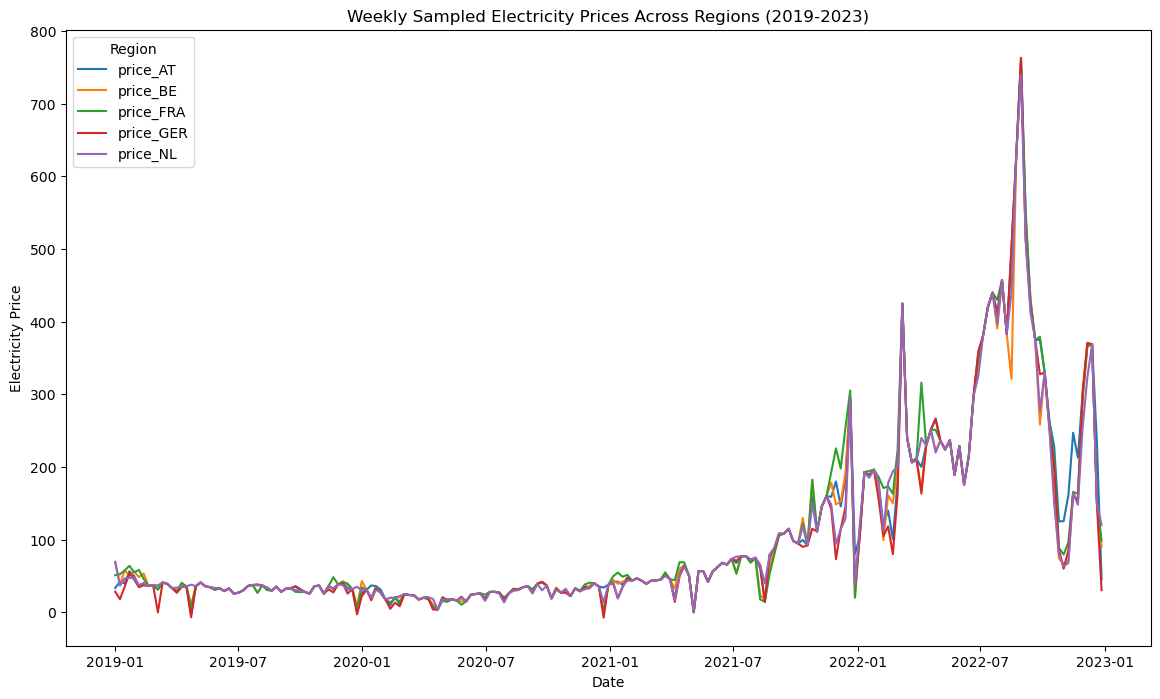

In [8]:
plt.figure(figsize=(14, 8))

for column in ['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']:
    # We'll plot a sample of the data to keep the plot legible and focused
    sampled_data = prices.loc[::24*7, ['date', column]]  # Weekly sampling for clarity
    sns.lineplot(x='date', y=column, data=sampled_data, label=column)

plt.title('Weekly Sampled Electricity Prices Across Regions (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Electricity Price')
plt.legend(title='Region')

plt.show()

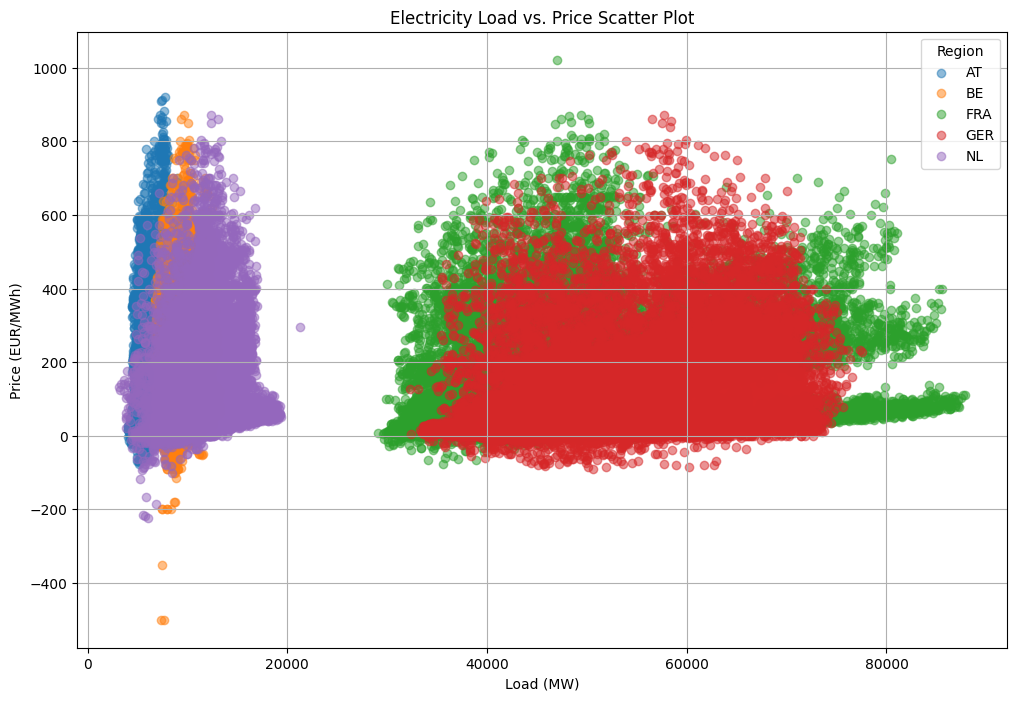

In [49]:
# Price vs. Load Scatter Plot
load_prices = pd.merge(load, prices, on='date', suffixes=('_load', '_price'))

plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(load_prices[f'load_{region}'], load_prices[f'price_{region}'], alpha=0.5, label=region)

plt.title('Electricity Load vs. Price Scatter Plot')
plt.xlabel('Load (MW)')
plt.ylabel('Price (EUR/MWh)')
plt.legend(title='Region')
plt.grid(True)

plt.show()


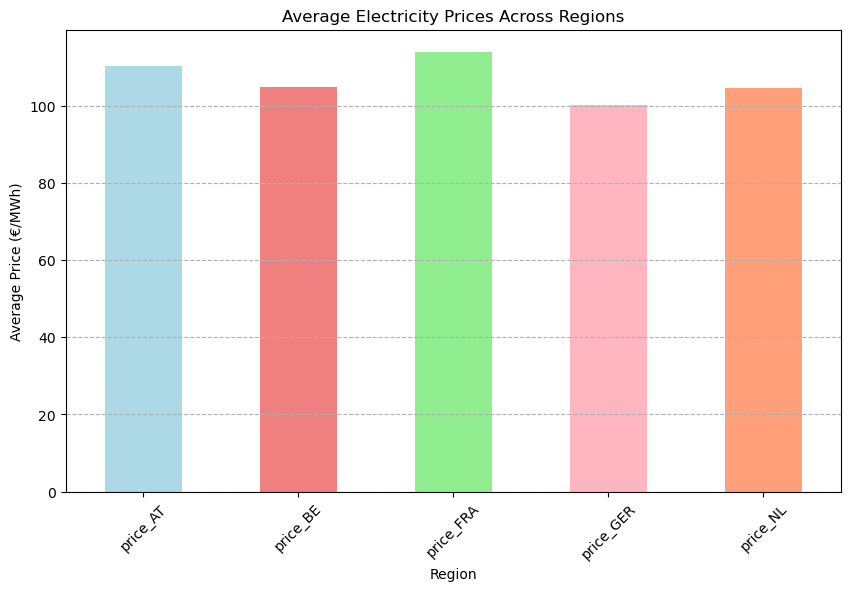

price_AT     110.297270
price_BE     104.920772
price_FRA    113.971035
price_GER    100.067287
price_NL     104.530584
dtype: float64


In [28]:
average_prices = prices[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].mean(skipna=True)
average_prices_plot = average_prices.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon'])

plt.title('Average Electricity Prices Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Price (€/MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

print(average_prices)

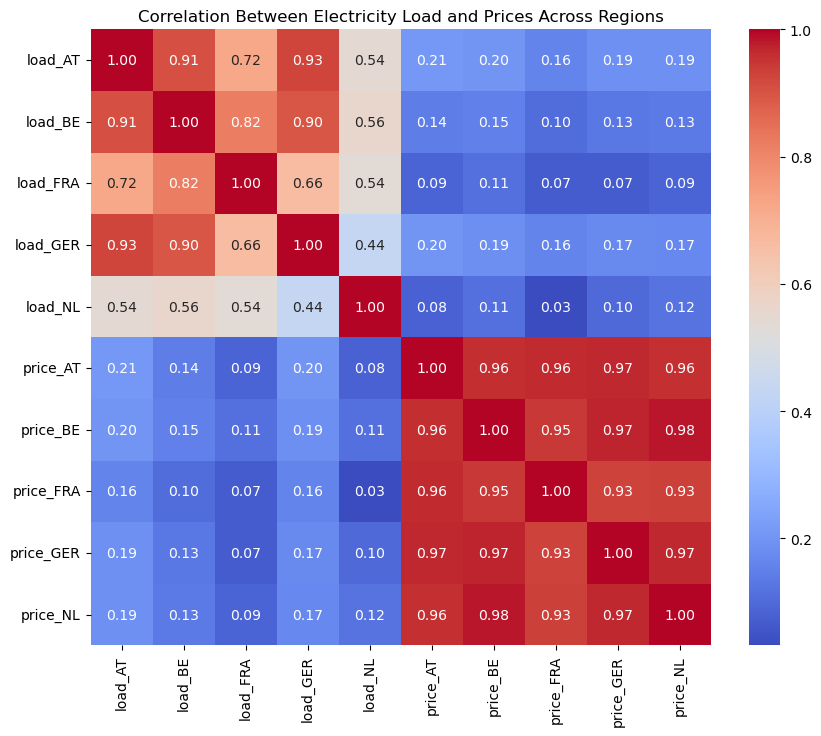

In [ ]:
# Correlation Heatmap Between Load and Price
load_prices_corr = load_prices[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL',
                                'price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(load_prices_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Between Electricity Load and Prices Across Regions')
plt.show()


## RES_GEN

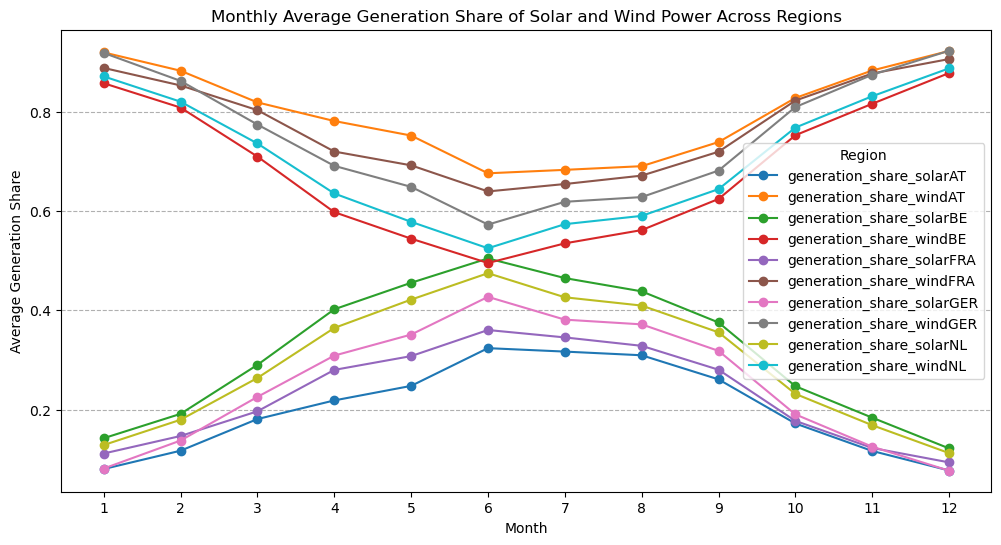

In [ ]:
# Renewable vs. Total Generation: For each region
res_gen['year'] = res_gen['date'].dt.year
res_gen['month'] = res_gen['date'].dt.month
res_gen['generation_totalAT'] = res_gen['solar_forecastAT'] + res_gen['windonshore_forecastAT'] 
res_gen['generation_totalBE'] = res_gen['solar_forecastBE'] + res_gen['windonshore_forecastBE']
res_gen['generation_totalFRA'] = res_gen['solar_forecastFRA'] + res_gen['windonshore_forecastFRA']
res_gen['generation_totalGER'] = res_gen['solar_forecastGER'] + res_gen['windonshore_forecastGER']
res_gen['generation_totalNL'] = res_gen['solar_forecastNL'] + res_gen['windonshore_forecastNL']

res_gen['generation_share_solarAT'] = res_gen['solar_forecastAT'] / res_gen['generation_totalAT']
res_gen['generation_share_solarBE'] = res_gen['solar_forecastBE'] / res_gen['generation_totalBE']
res_gen['generation_share_solarFRA'] = res_gen['solar_forecastFRA'] / res_gen['generation_totalFRA']
res_gen['generation_share_solarGER'] = res_gen['solar_forecastGER'] / res_gen['generation_totalGER']
res_gen['generation_share_solarNL'] = res_gen['solar_forecastNL'] / res_gen['generation_totalNL']

res_gen['generation_share_windAT'] = res_gen['windonshore_forecastAT'] / res_gen['generation_totalAT']
res_gen['generation_share_windBE'] = res_gen['windonshore_forecastBE'] / res_gen['generation_totalBE']
res_gen['generation_share_windFRA'] = res_gen['windonshore_forecastFRA'] / res_gen['generation_totalFRA']
res_gen['generation_share_windGER'] = res_gen['windonshore_forecastGER'] / res_gen['generation_totalGER']
res_gen['generation_share_windNL'] = res_gen['windonshore_forecastNL'] / res_gen['generation_totalNL']

# Plotting the monthly average generation share of solar and wind power for each region
monthly_avg_generation_share = res_gen.groupby('month')[['generation_share_solarAT', 'generation_share_windAT',
                                                         'generation_share_solarBE', 'generation_share_windBE',
                                                         'generation_share_solarFRA', 'generation_share_windFRA',
                                                         'generation_share_solarGER', 'generation_share_windGER',
                                                         'generation_share_solarNL', 'generation_share_windNL']].mean()

plt.figure(figsize=(12, 6))
for column in monthly_avg_generation_share.columns:
    plt.plot(monthly_avg_generation_share.index, monthly_avg_generation_share[column], marker='o', label=column)

plt.title('Monthly Average Generation Share of Solar and Wind Power Across Regions')
plt.xlabel('Month')
plt.ylabel('Average Generation Share')
plt.xticks(monthly_avg_generation_share.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()

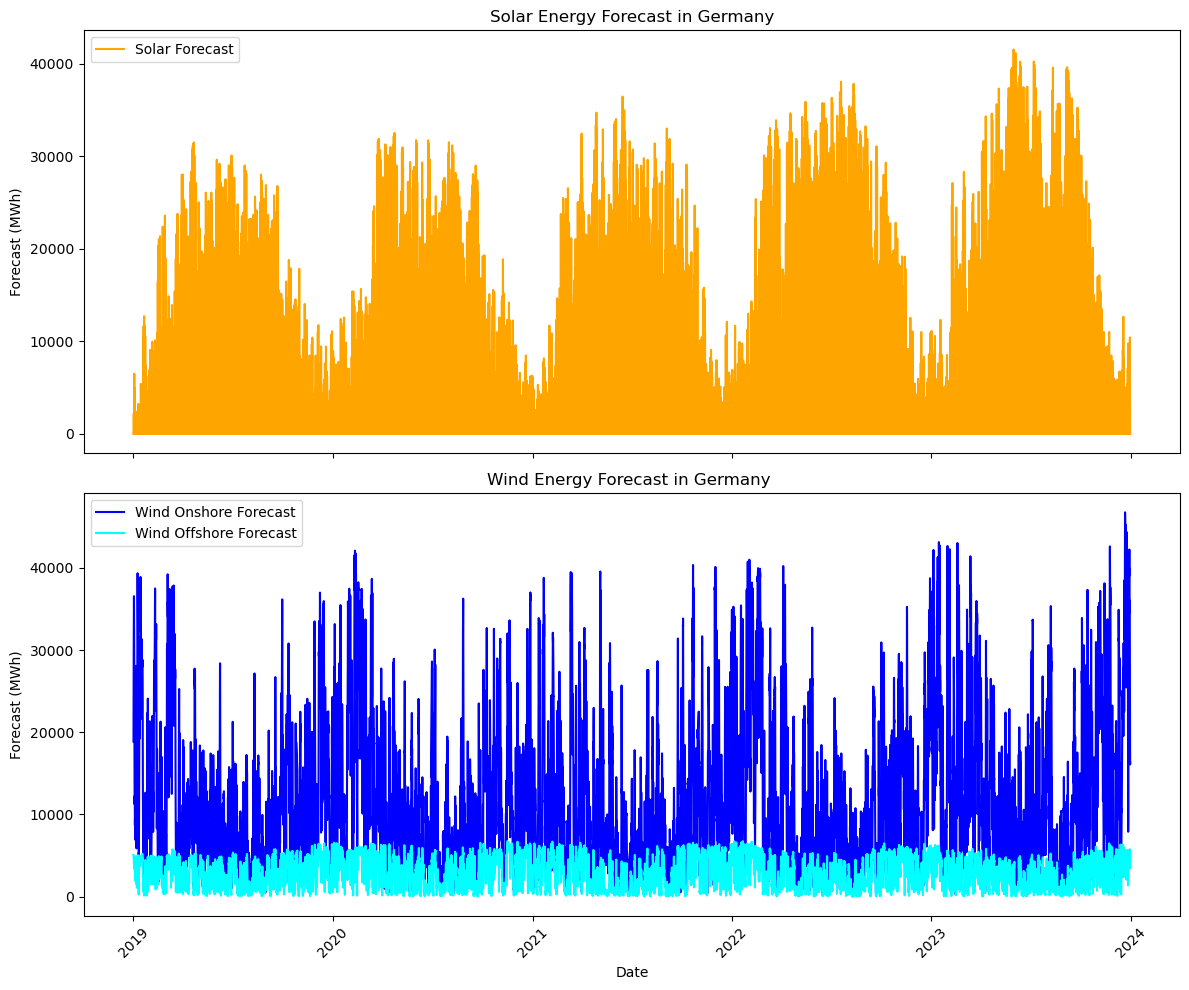

In [ ]:
data_subset = res_gen[(res_gen['date'] >= '2019-01-01') & (res_gen['date'] < '2023-12-31')]

# Time series plot for solar and wind energy forecasts in Germany as an example
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Solar forecast for Germany
ax[0].plot(data_subset['date'], data_subset['solar_forecastGER'], label='Solar Forecast', color='orange')
ax[0].set_title('Solar Energy Forecast in Germany')
ax[0].set_ylabel('Forecast (MWh)')
ax[0].legend()

# Wind forecast for Germany (combining onshore and offshore)
ax[1].plot(data_subset['date'], data_subset['windonshore_forecastGER'], label='Wind Onshore Forecast', color='blue')
ax[1].plot(data_subset['date'], data_subset['windoffshore_forecastGER'], label='Wind Offshore Forecast', color='cyan')
ax[1].set_title('Wind Energy Forecast in Germany ')
ax[1].set_ylabel('Forecast (MWh)')
ax[1].set_xlabel('Date')
ax[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## RESIDUAL_GENERATION

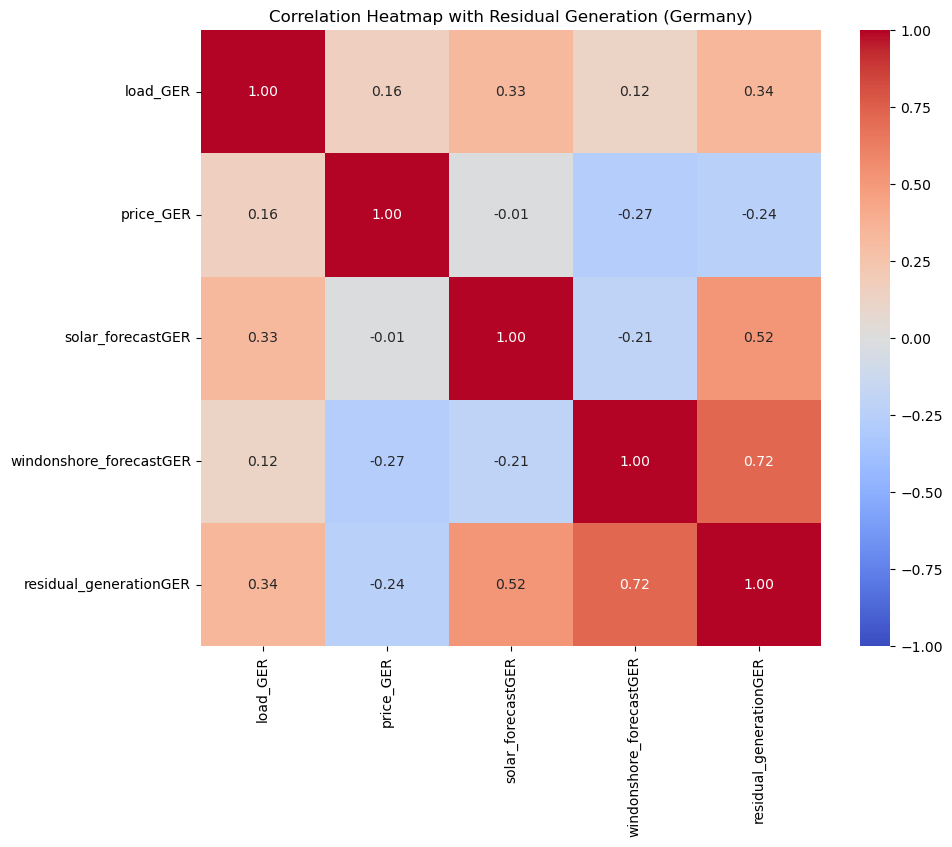

In [29]:
merged_data = pd.merge(load, prices, on='date', how='inner')
comprehensive_data = pd.merge(merged_data, res_gen, on='date', how='inner')

comprehensive_data_with_residual = pd.merge(comprehensive_data, residual_gen, on='date', how='inner')

variables_of_interest_with_residual = [
    'load_GER', 
    'price_GER', 
    'solar_forecastGER', 
    'windonshore_forecastGER',
    'residual_generationGER'
]

# Subset the data to only include the variables of interest
subset_data_with_residual = comprehensive_data_with_residual[variables_of_interest_with_residual]

# Calculating the correlation matrix for the selected subset with 'residual_generationGER'
correlation_matrix_with_residual = subset_data_with_residual.corr()

# Plotting the correlation heatmap with 'residual_generationGER'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_residual, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Residual Generation (Germany)')
plt.show()

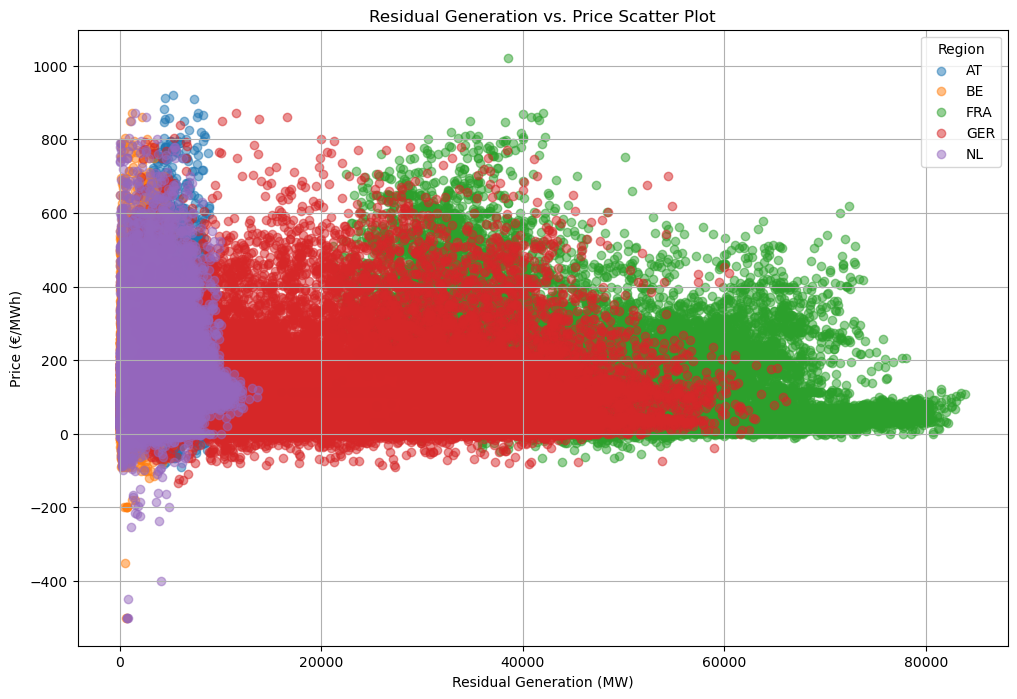

In [ ]:
plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(residual_gen[f'residual_generation{region}'], prices[f'price_{region}'][1:42961], alpha=0.5, label=region)

plt.title('Residual Generation vs. Price Scatter Plot')
plt.xlabel('Residual Generation (MW)')
plt.ylabel('Price (€/MWh)')
plt.legend(title='Region')
plt.grid(True)

plt.show()